#                                            # Air Pollution Epidemiology

# Reading the Dataset

In [374]:
import pandas as pd
# Load CO_Halifax data
CO_data=pd.read_csv('CO_Halifax.csv')
CO_data.head(10)

,Date & Time,Pollutant,Unit,Station,Average
0,01/01/2019 12:00:00 AM,CO,ppm,Halifax Johnston,0.25
1,01/01/2019 01:00:00 AM,CO,ppm,Halifax Johnston,0.26
2,01/01/2019 02:00:00 AM,CO,ppm,Halifax Johnston,0.20
3,01/01/2019 03:00:00 AM,CO,ppm,Halifax Johnston,0.17
4,01/01/2019 04:00:00 AM,CO,ppm,Halifax Johnston,0.15
5,01/01/2019 05:00:00 AM,CO,ppm,Halifax Johnston,0.14
6,01/01/2019 06:00:00 AM,CO,ppm,Halifax Johnston,0.14
7,01/01/2019 07:00:00 AM,CO,ppm,Halifax Johnston,0.12
8,01/01/2019 08:00:00 AM,CO,ppm,Halifax Johnston,0.12
9,01/01/2019 09:00:00 AM,CO,ppm,Halifax Johnston,0.12


In [375]:
# Load traffic data
TRAFFIC_data=pd.read_csv('cleaned_traffic_data.csv')
TRAFFIC_data.head(10)    

,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT
0,2019-09-09,1,47,4.50,2.566,2.430
1,2019-06-17,1,50,7.60,4.266,3.840
2,2019-06-17,1,50,7.60,3.934,3.545
3,2019-06-17,1,50,7.60,2.924,2.640
4,2019-09-09,1,50,7.60,6.164,5.520
5,2019-06-17,1,50,7.60,2.984,2.690
6,2019-09-16,1,60,4.61,4.351,3.880
7,2019-09-09,1,65,9.75,2.074,1.780
8,2019-09-09,1,70,3.67,4.079,3.650
9,2019-09-09,1,80,8.96,2.233,2.000


In [376]:
# Data types of CO data:
print(CO_data.dtypes)

Date & Time     object
Pollutant       object
Unit            object
Station         object
Average        float64
dtype: object


In [377]:
# Data types of traffic data: 
print(TRAFFIC_data.dtypes)

Date               object
HIGHWAY             int64
SECTION             int64
SECTION LENGTH    float64
ADT               float64
AADT              float64
dtype: object


# Data Preprocessing

In [378]:
# Drop the specified columns from the CO dataset
CO_data.drop(['Pollutant', 'Unit', 'Station'], axis=1, inplace=True)

In [379]:
#After droping
CO_data.head(5)

,Date & Time,Average
0,01/01/2019 12:00:00 AM,0.25
1,01/01/2019 01:00:00 AM,0.26
2,01/01/2019 02:00:00 AM,0.20
3,01/01/2019 03:00:00 AM,0.17
4,01/01/2019 04:00:00 AM,0.15


In [380]:
CO_data.sort_values(by='Date & Time',ascending=True,inplace=True)
CO_data

,Date & Time,Average
26303,01/01/1994 01:00:00 AM,0.60
26315,01/01/1994 01:00:00 PM,0.40
26304,01/01/1994 02:00:00 AM,0.40
26316,01/01/1994 02:00:00 PM,0.50
26305,01/01/1994 03:00:00 AM,0.50
...,...,...
26301,12/31/2020 10:00:00 PM,0.13
26290,12/31/2020 11:00:00 AM,0.02
26302,12/31/2020 11:00:00 PM,0.12
26279,12/31/2020 12:00:00 AM,0.51


In [381]:
# Convert 'Date & Time' to datetime
CO_data['Date'] = pd.to_datetime(CO_data['Date & Time']).dt.strftime('%Y-%m-%d')

In [382]:
# Filter for the year 2019
CO_data_2019 = CO_data[(CO_data['Date'] >= '2019-01-01') & (CO_data['Date'] < '2019-12-31')]

In [383]:
# Compute daily average CO levels for 2019
daily_avg_co_2019 = CO_data_2019.groupby('Date')['Average'].mean().reset_index()

In [384]:
daily_avg_co_2019.head(10)

,Date,Average
0,2019-01-01,0.146250
1,2019-01-02,0.152917
2,2019-01-03,0.198333
3,2019-01-04,0.178333
4,2019-01-05,0.197083
5,2019-01-06,0.159167
6,2019-01-07,0.150000
7,2019-01-08,0.165833
8,2019-01-09,0.136667
9,2019-01-10,0.171667


In [385]:
# Min-Max scaling to normalize CO levels between 0 and 1
min_co_level = daily_avg_co_2019['Average'].min()
max_co_level = daily_avg_co_2019['Average'].max()
daily_avg_co_2019['CO_Level_normalized'] = (daily_avg_co_2019['Average'] - min_co_level) / (max_co_level - min_co_level)


In [386]:
# Discretize CO levels using a threshold of 0.5
daily_avg_co_2019['CO_Level_discretized'] = daily_avg_co_2019['CO_Level_normalized'].apply(lambda x: 'High' if x >= 0.5 else 'Low')

In [387]:
daily_avg_co_2019.head(20)

,Date,Average,CO_Level_normalized,CO_Level_discretized
0,2019-01-01,0.146250,0.599010,High
1,2019-01-02,0.152917,0.638614,High
2,2019-01-03,0.198333,0.908416,High
3,2019-01-04,0.178333,0.789604,High
4,2019-01-05,0.197083,0.900990,High
5,2019-01-06,0.159167,0.675743,High
6,2019-01-07,0.150000,0.621287,High
7,2019-01-08,0.165833,0.715347,High
8,2019-01-09,0.136667,0.542079,High
9,2019-01-10,0.171667,0.750000,High


In [388]:
# Convert 'Date' to datetime
TRAFFIC_data.sort_values(by='Date',ascending=True,inplace=True)
TRAFFIC_data['Date']=pd.to_datetime(TRAFFIC_data['Date'])
TRAFFIC_data['Date']=TRAFFIC_data['Date'].dt.strftime('%Y-%m-%d')
TRAFFIC_data

,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT
195,2019-04-25,101,50,6.82,7.972,8.30
202,2019-04-25,101,70,1.71,8.066,8.39
201,2019-04-25,101,70,1.71,7.737,8.05
196,2019-04-25,101,50,6.82,7.931,8.25
199,2019-04-25,101,65,2.13,8.125,8.23
...,...,...,...,...,...,...
207,2019-12-09,102,15,0.82,28.465,29.70
206,2019-12-09,102,10,1.38,26.554,27.70
212,2019-12-12,102,25,3.22,30.750,32.10
213,2019-12-18,102,30,1.98,30.348,32.22


In [389]:
 #Merge the two dataset on date
merged_dataset=pd.merge(TRAFFIC_data,daily_avg_co_2019,left_on='Date',right_on='Date')

In [390]:
merged_dataset



,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,Average,CO_Level_normalized,CO_Level_discretized
0,2019-04-25,101,50,6.82,7.972,8.30,0.117917,0.430693,Low
1,2019-04-25,101,70,1.71,8.066,8.39,0.117917,0.430693,Low
2,2019-04-25,101,70,1.71,7.737,8.05,0.117917,0.430693,Low
3,2019-04-25,101,50,6.82,7.931,8.25,0.117917,0.430693,Low
4,2019-04-25,101,65,2.13,8.125,8.23,0.117917,0.430693,Low
...,...,...,...,...,...,...,...,...,...
581,2019-12-09,102,15,0.82,28.465,29.70,0.045417,0.000000,Low
582,2019-12-09,102,10,1.38,26.554,27.70,0.045417,0.000000,Low
583,2019-12-12,102,25,3.22,30.750,32.10,0.058750,0.079208,Low
584,2019-12-18,102,30,1.98,30.348,32.22,0.123750,0.465347,Low


In [391]:
merged_dataset.rename(columns={'Average':'CO_Level'},inplace=True)
merged_dataset

,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,CO_Level,CO_Level_normalized,CO_Level_discretized
0,2019-04-25,101,50,6.82,7.972,8.30,0.117917,0.430693,Low
1,2019-04-25,101,70,1.71,8.066,8.39,0.117917,0.430693,Low
2,2019-04-25,101,70,1.71,7.737,8.05,0.117917,0.430693,Low
3,2019-04-25,101,50,6.82,7.931,8.25,0.117917,0.430693,Low
4,2019-04-25,101,65,2.13,8.125,8.23,0.117917,0.430693,Low
...,...,...,...,...,...,...,...,...,...
581,2019-12-09,102,15,0.82,28.465,29.70,0.045417,0.000000,Low
582,2019-12-09,102,10,1.38,26.554,27.70,0.045417,0.000000,Low
583,2019-12-12,102,25,3.22,30.750,32.10,0.058750,0.079208,Low
584,2019-12-18,102,30,1.98,30.348,32.22,0.123750,0.465347,Low


# Descriptive Statistics of the datasets

In [392]:
#a descriptive analysis
description = merged_dataset.describe()
print(description)

          HIGHWAY     SECTION  SECTION LENGTH         ADT       AADT  \
count  586.000000  586.000000      586.000000  586.000000  586.00000   
mean   148.576792   52.779863        7.401891  197.050370  212.73780   
std    125.552938   56.718809        3.981491  304.282428  303.89292   
min      1.000000    1.000000        0.200000    1.004000    1.00000   
25%      7.000000   17.000000        4.150000    2.838750    3.60000   
50%    104.000000   30.000000        7.253500    8.162000   10.95000   
75%    245.000000   60.000000       10.040000  381.500000  430.00000   
max    376.000000  270.000000       20.720000  995.000000  990.00000   

         CO_Level  CO_Level_normalized  
count  586.000000           586.000000  
mean     0.112084             0.396045  
std      0.024675             0.146586  
min      0.045417             0.000000  
25%      0.092917             0.282178  
50%      0.110833             0.388614  
75%      0.124583             0.470297  
max      0.186875      

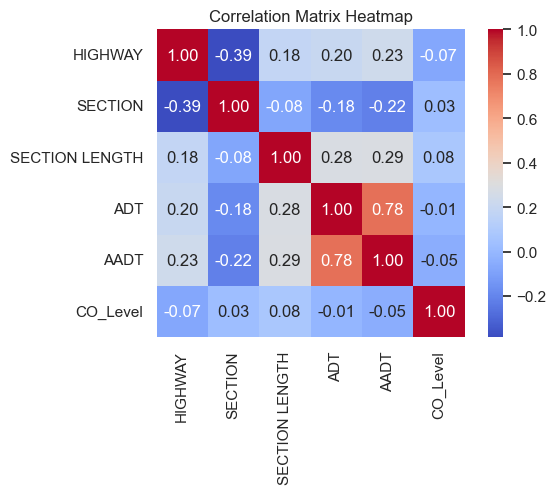

In [393]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
selected_columns = ['HIGHWAY', 'SECTION', 'SECTION LENGTH', 'ADT', 'AADT', 'CO_Level']

# Create a correlation matrix for the selected columns
correlation_matrix = merged_dataset[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Visualization of data

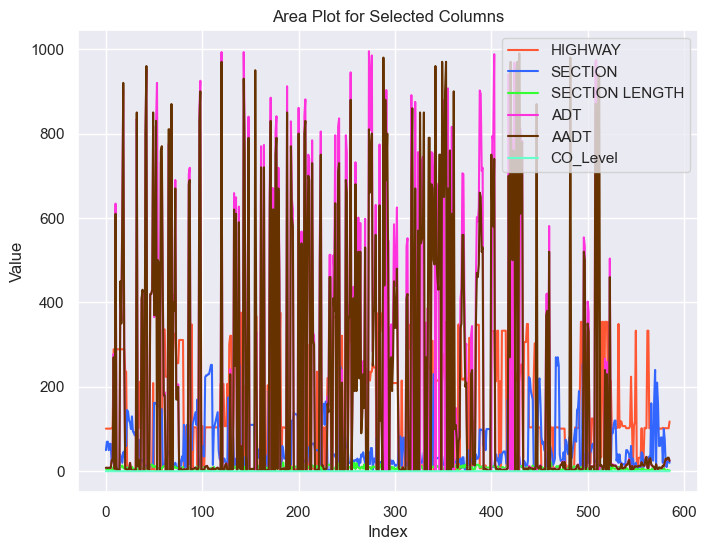

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
selected_columns = ['HIGHWAY', 'SECTION', 'SECTION LENGTH', 'ADT', 'AADT', 'CO_Level']

# Set the Seaborn style (you can change this to any available style)
sns.set_style("darkgrid")

# Create a line plot with the selected style
plt.figure(figsize=(8, 6))

# Plot the selected columns
for column in selected_columns:
    sns.lineplot(data=merged_dataset, x=merged_dataset.index, y=column, label=column)

plt.title('Area Plot for Selected Columns')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


# Select influential factor & Information Gain 

In [395]:
drop_features=['CO_Level','Date','CO_Level_normalized','CO_Level_discretized']


In [396]:
from collections import Counter
# Define a function to calculate entropy
data = merged_dataset.drop(drop_features, axis=1)
def entropy(target):
    # Calculate entropy based on the distribution of classes in the target variable
    # Replace 'target' with the actual name of your target variable column
    counts = Counter(target)
    entropy = 0
    total_samples = len(target)
    for count in counts.values():
        p = count / total_samples
        entropy -= p * np.log2(p)
    return entropy
  

# Calculate the entropy of the target variable before the split
target_entropy = entropy(merged_dataset['CO_Level_discretized'])

# Initialize variables to keep track of the best attribute and its IG
best_attribute = None
best_ig = -1  # Set to a negative value to ensure any IG is better

# Iterate through each attribute and calculate IG
for attribute in data.columns:
    if attribute == 'CO_Level_discretized':
        continue  # Skip the target variable itself
    attribute_values = data[attribute]
    ig = target_entropy  # Initialize with the parent entropy

    # Iterate through unique values of the attribute
    for value in set(attribute_values):
        # Split the data based on the attribute value
        subset_indices = [i for i, val in enumerate(attribute_values) if val == value]
        subset_target = [merged_dataset['CO_Level_discretized'][i] for i in subset_indices]

        # Calculate the IG for this attribute value
        ig -= (len(subset_target) / len(data)) * entropy(subset_target)

    # Check if this attribute has a higher IG
    print(f'Information gain for:{attribute}','--',ig)
    if ig > best_ig:
        best_ig = ig
        best_attribute = attribute

# The 'best_attribute' now contains the attribute with the highest IG
print(f'Attribute with the highest Information Gain (most_influential_factor): {best_attribute}')
print(f'Information Gain for the root node: {best_ig}')

Information gain for:HIGHWAY -- 0.2224828669132049
Information gain for:SECTION -- 0.16971134646773953
Information gain for:SECTION LENGTH -- 0.536753356780813
Information gain for:ADT -- 0.6441521570701433
Information gain for:AADT -- 0.4758156333259556
Attribute with the highest Information Gain (most_influential_factor): ADT
Information Gain for the root node: 0.6441521570701433


# Hold_out method

In [397]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
from sklearn.model_selection import train_test_split

X = merged_dataset.drop(drop_features, axis=1)  # Replace 'Target_Variable' with your actual target variable
y = merged_dataset['CO_Level_discretized']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


NameError: name 'merged_dataset' is not defined

In [399]:
X

,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT
0,101,50,6.82,7.972,8.30
1,101,70,1.71,8.066,8.39
2,101,70,1.71,7.737,8.05
3,101,50,6.82,7.931,8.25
4,101,65,2.13,8.125,8.23
...,...,...,...,...,...
581,102,15,0.82,28.465,29.70
582,102,10,1.38,26.554,27.70
583,102,25,3.22,30.750,32.10
584,102,30,1.98,30.348,32.22


In [1]:
# Train a Decision Tree Classifier (you should have X_train and y_train)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Accuracy:", accuracy)
# Number of mislabeled points
print("Number of mislabeled points out of a total %d test points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

NameError: name 'X_train' is not defined

In [401]:
from sklearn.tree import DecisionTreeClassifier

# Access the underlying tree structure
tree = clf.tree_

# Define a custom function to find the minimum leaf depth
def find_min_leaf_depth(node_index=0, depth=0):
    if tree.children_left[node_index] == tree.children_right[node_index]:
        return depth
    left_depth = find_min_leaf_depth(tree.children_left[node_index], depth + 1)
    right_depth = find_min_leaf_depth(tree.children_right[node_index], depth + 1)
    return min(left_depth, right_depth)

# Find the minimum leaf depth by starting at the root node
min_leaf_depth = find_min_leaf_depth(0)
print("Minimum Depth of the tree:", min_leaf_depth)



Minimum Depth of the tree: 3


# 10-fold cross validation

In [402]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [403]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Create a 10-fold cross-validation generator
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get predicted values
predicted = cross_val_predict(model, X, y, cv=cv)


In [404]:
# Calculate the confusion matrix
confusion_mat = confusion_matrix(y, predicted)

# Generate a classification report
class_report = classification_report(y, predicted)

# Calculate accuracy using cross_val_score
accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Print the confusion matrix, classification report, and accuracy
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", class_report)
print("Accuracy for each fold:", accuracy)
print("Mean Accuracy:", accuracy.mean())

Confusion Matrix:
 [[ 65  40]
 [ 41 440]]
Classification Report:
               precision    recall  f1-score   support

        High       0.61      0.62      0.62       105
         Low       0.92      0.91      0.92       481

    accuracy                           0.86       586
   macro avg       0.76      0.77      0.77       586
weighted avg       0.86      0.86      0.86       586

Accuracy for each fold: [0.88135593 0.83050847 0.89830508 0.86440678 0.77966102 0.89830508
 0.87931034 0.84482759 0.89655172 0.84482759]
Mean Accuracy: 0.8618059614260666
